# Citi Bike Trips vs Weather (2022)

This notebook loads the **already-processed merged daily dataset** (trip counts + mean temperature) and produces the required Matplotlib visualizations. It also includes quick validation checks to confirm the merge is correct and covers all of 2022.

In [1]:

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# --- Locate merged dataset robustly ---
# Expected project location (relative to repo root):
# Data/Processed/citibike_weather_merged_2022.csv
candidates = [
    Path("Data") / "Processed" / "citibike_weather_merged_2022.csv",
    Path("..") / "Data" / "Processed" / "citibike_weather_merged_2022.csv",
    Path.cwd() / "Data" / "Processed" / "citibike_weather_merged_2022.csv",
    Path.cwd().parent / "Data" / "Processed" / "citibike_weather_merged_2022.csv",
]

data_path = next((p for p in candidates if p.exists()), None)
if data_path is None:
    raise FileNotFoundError(
        "Could not find citibike_weather_merged_2022.csv. "
        "Make sure it exists at Data/Processed/ in your project."
    )

print("Using data file:", data_path.resolve())

df = pd.read_csv(data_path, parse_dates=["date"]).sort_values("date")
df.head()


Using data file: C:\Users\User\Downloads\Citibike-Weather-Dashboard\Data\Processed\citibike_weather_merged_2022.csv


,date,daily_trips,temp_avg_c
0,2022-01-01,592,11.6
1,2022-01-02,1248,11.4
2,2022-01-03,832,1.4
3,2022-01-04,934,-2.7
4,2022-01-05,914,3.2


## 1) Validate the merge and date coverage

These checks confirm:
- One row per day (365 rows)
- Date range covers all of 2022
- Temperature column is populated (no missing values)

In [2]:

print("Rows:", df.shape[0])
print("Columns:", df.columns.tolist())
print("Date range:", df["date"].min(), "to", df["date"].max())
print("Duplicate dates:", df["date"].duplicated().sum())
print("Missing temp_avg_c:", df["temp_avg_c"].isna().sum())
print("Missing daily_trips:", df["daily_trips"].isna().sum())

df[["daily_trips", "temp_avg_c"]].describe()


Rows: 365
Columns: ['date', 'daily_trips', 'temp_avg_c']
Date range: 2022-01-01 00:00:00 to 2022-12-31 00:00:00
Duplicate dates: 0
Missing temp_avg_c: 0
Missing daily_trips: 0


,daily_trips,temp_avg_c
count,365.000000,365.000000
mean,2453.383562,16.574521
std,1096.925915,9.181921
min,111.000000,-8.000000
25%,1510.000000,10.400000
50%,2394.000000,20.800000
75%,3469.000000,21.200000
max,4527.000000,31.300000


## 2) Temperature time series (pandas plotting)

Requirement: *Create a line plot of temperatures for 2022 plotted as time series using the weather dataframe (pandas plotting function).*

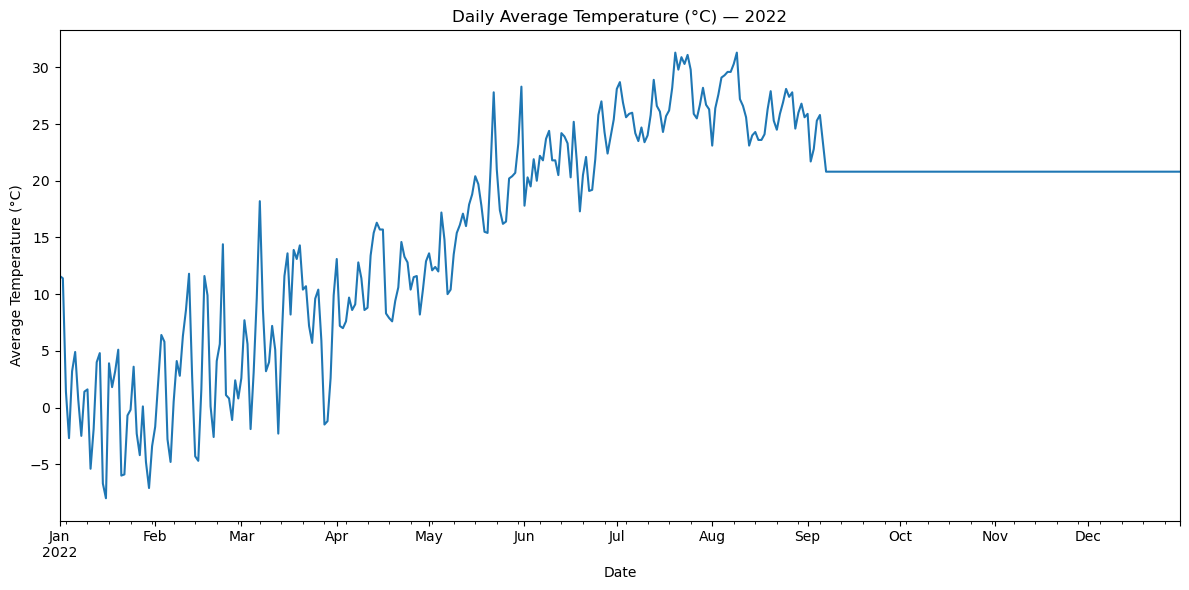

In [3]:

ax = df.plot(
    x="date",
    y="temp_avg_c",
    figsize=(12, 6),
    title="Daily Average Temperature (°C) — 2022",
    legend=False
)
ax.set_xlabel("Date")
ax.set_ylabel("Average Temperature (°C)")
plt.tight_layout()
plt.show()


## 3) Dual-axis line chart (Trips vs Temperature)

Requirement: *Create a line chart of bike trip counts and temperatures plotted on a dual axis.*

We use Matplotlib's **object-oriented (OO) paradigm**: we explicitly create a `Figure` and `Axes`, then create a second y-axis with `twinx()` for the temperature series.

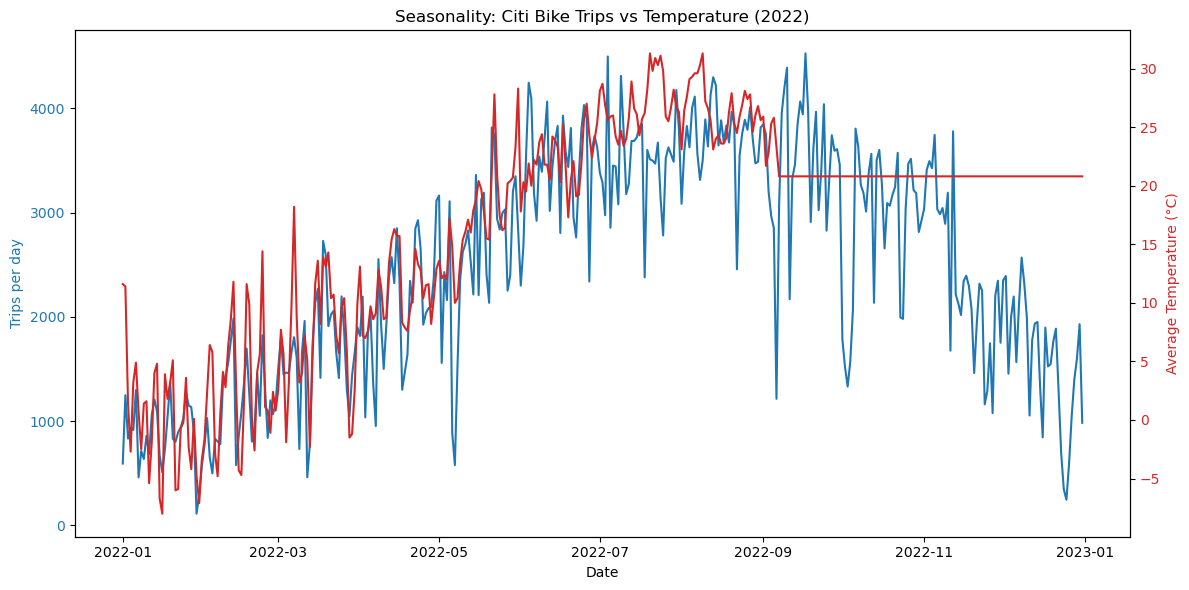

In [4]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left axis: trips
ax1.plot(df["date"], df["daily_trips"], color="tab:blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Trips per day", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Right axis: temperature
ax2 = ax1.twinx()
ax2.plot(df["date"], df["temp_avg_c"], color="tab:red")
ax2.set_ylabel("Average Temperature (°C)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

ax1.set_title("Seasonality: Citi Bike Trips vs Temperature (2022)")
fig.tight_layout()
plt.show()



## 4) Brief explanation (Matplotlib + paradigm)

- The temperature-only plot uses pandas’ `.plot()` convenience method, which calls Matplotlib internally to create the figure and axes.
- For the dual-axis chart, Matplotlib was used directly with the **object-oriented paradigm**: a `Figure` and primary `Axes` (`ax1`) were created via `plt.subplots()`, and a secondary y-axis (`ax2`) was created with `ax1.twinx()`.
- Using two y-axes allows both series to share the same date axis while keeping independent scales and labels for trips and temperature.
